#**Nhập môn Trí tuệ Nhân tạo**

  * Bài thực hành tuần 2   
  * Sinh viên: Huỳnh Thị Bảo Trân   
  * MSSV: 19110482

**Đề bài:**      
3.9 The missionaries and cannibals problem is usually stated as follows. Three missionaries and three cannibals are on one side of a river, along with a boat that can hold one or two people. Find a way to get everyone to the other side, without ever leaving a group of missionaries in one place outnumbered by the cannibals in 
that place. This problem is famous in AI because it was the subject of the first paper that approached problem formulation from ananalytical viewpoint (Amarel, 1968).         
* Formulate the problem precisely, making only those distinctions necessary to ensure a valid solution. Draw a diagram of the complete state space.      
* Implement and solve the problem optimally using an appropriate search algorithm. Is it a good idea to check for repeated states?      

**1. Vẽ sơ đồ liệt kê tất cả các khả năng có thể để tìm lời giải của bài toán (search tree)**

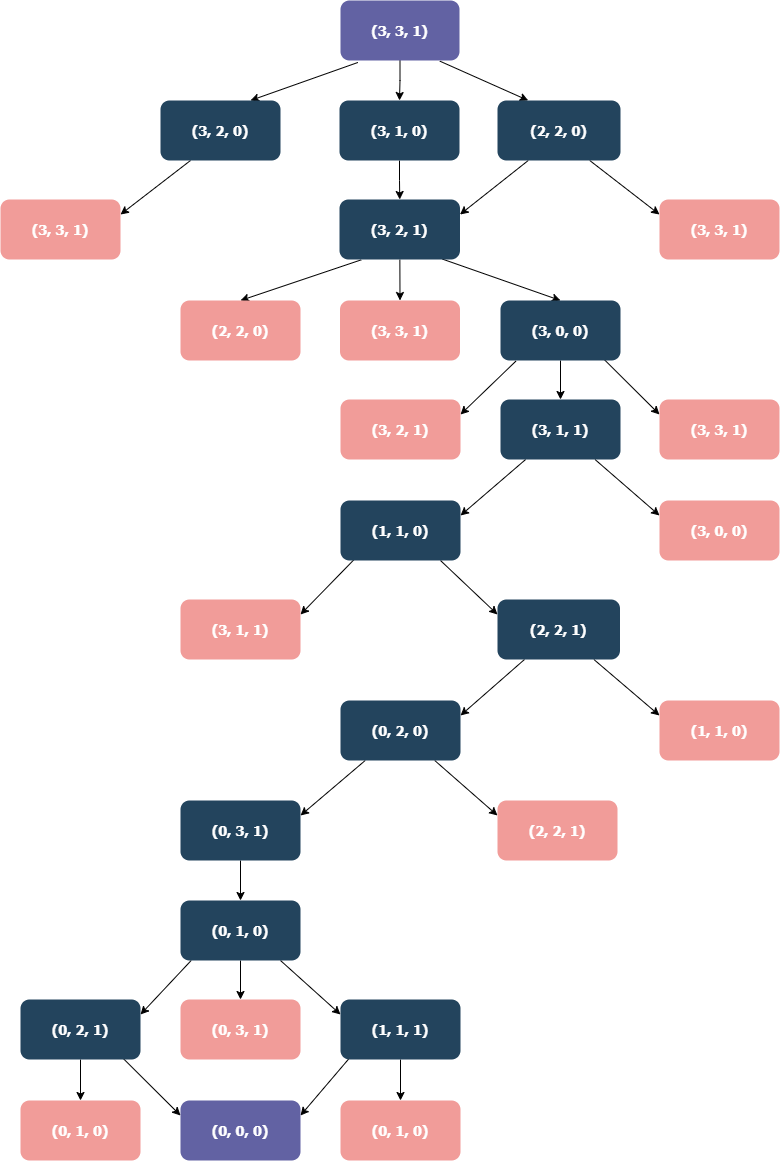

In [3]:
from IPython.display import display, Image
display(Image(filename='AI_week2.png'))

**2. Thư viện được sử dụng**

In [10]:
from queue import Queue, PriorityQueue
from collections import deque
import numpy as np
import pydotplus

**3. Xây dựng class State**

Lớp state trong đó bao gồm: 
* Hàm init dùng để thực thi các thực thể một cách tự động.
* Hàm str.
* Hàm is_valid dùng để so sánh điều kiện nếu như số người trền giáo và số quỹ ăn thịt người bé hơn 0 hoặc lớn hơn 3 thì return false tương tự với thuyền nếu vị trí của thuyền lớn hơn 1 và bé hơn 0 cũng return false. 
* Hàm goal dùng để thể hiện điều kiện kết thúc khi a=0,b=0,k=0. 
* Hàm new_states dùng để xuất ra màn hình lời giải của bài và new_state = State(dat.a + p*x, dat.b + p*y, dat.k + p*1, by_move). 

In [11]:
class State(object):
  def __init__(dat, a, b, k, by_move):
    dat.a = a
    dat.b = b
    dat.k = k
    dat.by_move = by_move

  def __str__(dat):
    return "%s, %s %s %s" %(dat.by_move, dat.a, dat.b, dat.k)

  def is_valid(dat):
    if dat.a < 0 or dat.a > 3:
      return False
    if dat.b < 0 or dat.b > 3:
      return False
    if dat.k > 1 or dat.k < 0:
      return False
    if dat.a < dat.b and dat.a > 0:
      return False
    if dat.a > dat.b and dat.a < 3:
      return False
    return True
        
  def goal(dat):
    return dat.a == 0 and dat.b == 0 and dat.k == 0

  def new_states(dat):
    p = -1
    k_move = "tu bo ta ngan sang bo huu ngan"
    if dat.k == 0:
      p = 1 
      k_move = "tu bo huu ngan sang bo ta ngan"
    for x in range(3):
      for y in range(3):
        by_move = "di chuyen %s nguoi truyen giao va %s quy an thit %s" %(x, y, k_move)
        new_state = State(dat.a + p*x, dat.b + p*y, dat.k + p*1, by_move)
        if x+y >= 1 and x+y <= 2 and new_state.is_valid():
          yield new_state


**4. Xây dựng class Node**

Class Node được xây dựng bao gồm:
* Hàm init dùng để thực thi các thực thể một cách tự động.
* Hàm str.
* Hàm childrens.
* Hàm extract_solution.

In [12]:
class Node(object):
  def __init__(dat, father, state, depth):
    dat.father = father
    dat.state = state
    dat.depth = depth
    dat.dot_node = pydotplus.Node(str(dat), style="filled")

  def __str__(dat):
    return dat.state.__str__()

  def childrens(dat):
    for state in dat.state.new_states():
      yield Node(father=dat, state=state, depth=dat.depth+1)

  def extract_solution(dat):
    print ("Extracting soln")
    solution = []
    node = dat
    solution.append(node)
    
    while node.father is not None:
      solution.append(node.father)
      node = node.father
    solution.reverse()
    return solution

**5. Thuật toán Best First Search (BFS)**
* Cho frontier, list_father, explored strack rỗng, truyền vào frontier dữ liệu ở vị trí start=1.
* Giả sử đúng, ta kiểm frontier nếu không có dữ kiệu thì ta xuất ra màn hình là “no way” và dừng lại.
* Sau đó loại vị trí đầu.
* Ta xét node, nếu node ở vị trí cuối thì thêm vị trí cuối vào result[], gán end_index=0 sau đó chạy vòng for.
* Nếu vị trí end-1 tới sons, gán end_index=i sau đó dừng lại.
* Gán find=father, thêm find+1 và result.
* Thêm father+1 vào result [], gán find=father.
* Sao đó chạy ngược lại result và gán lại result, gán result =[str(num) for num in result].
* Tạo tem[]. For chạy i đến chiều dài của node.
* Thêm i vào frontier và thêm temp và node vào list_father.

In [13]:
def BFS(root):
  graph = pydotplus.Dot(graph_type='digraph')
  graph.add_node(root.dot_node)
  queue = deque([root])
  list = []

  while True:
    if not queue:
      print('no way')
      return None
    node = queue.popleft()

    if str(node) in list:
      continue
    list.append(str(node))
    dot_node = node.dot_node
    graph.add_node(node.dot_node)

    if node.father:
      graph.add_edge(pydotplus.Edge(node.father.dot_node, node.dot_node))

    if node.state.goal():
      graph.write_png('solution.png')
      return node.extract_solution()
      
    for child in node.childrens():
      queue.append(child)


**6. Kết quả (main)**

In [14]:
initial_state = State(3, 3, 1, "Initial State")
root = Node(father=None, state=initial_state, depth=0)
for state in BFS(root):
  print(state)

Extracting soln
Initial State, 3 3 1
di chuyen 0 nguoi truyen giao va 2 quy an thit tu bo ta ngan sang bo huu ngan, 3 1 0
di chuyen 0 nguoi truyen giao va 1 quy an thit tu bo huu ngan sang bo ta ngan, 3 2 1
di chuyen 0 nguoi truyen giao va 2 quy an thit tu bo ta ngan sang bo huu ngan, 3 0 0
di chuyen 0 nguoi truyen giao va 1 quy an thit tu bo huu ngan sang bo ta ngan, 3 1 1
di chuyen 2 nguoi truyen giao va 0 quy an thit tu bo ta ngan sang bo huu ngan, 1 1 0
di chuyen 1 nguoi truyen giao va 1 quy an thit tu bo huu ngan sang bo ta ngan, 2 2 1
di chuyen 2 nguoi truyen giao va 0 quy an thit tu bo ta ngan sang bo huu ngan, 0 2 0
di chuyen 0 nguoi truyen giao va 1 quy an thit tu bo huu ngan sang bo ta ngan, 0 3 1
di chuyen 0 nguoi truyen giao va 2 quy an thit tu bo ta ngan sang bo huu ngan, 0 1 0
di chuyen 0 nguoi truyen giao va 1 quy an thit tu bo huu ngan sang bo ta ngan, 0 2 1
di chuyen 0 nguoi truyen giao va 2 quy an thit tu bo ta ngan sang bo huu ngan, 0 0 0
